#### Laplacian Derivatives ####

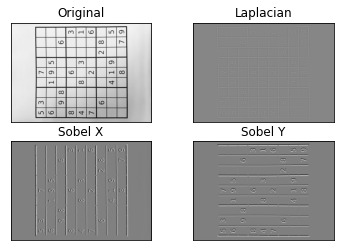

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/Users/hwangseho/Desktop/IP_2022/sIMG_2164.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

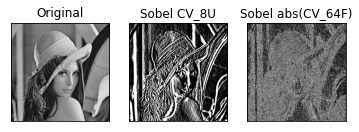

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/Users/hwangseho/Desktop/IP_2022/lena.png',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

#### Canny Edge Detection ####

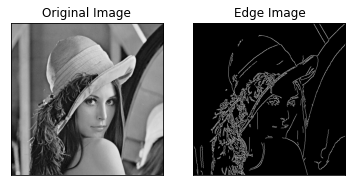

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/Users/hwangseho/Desktop/IP_2022/lena.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

#### Contours ####

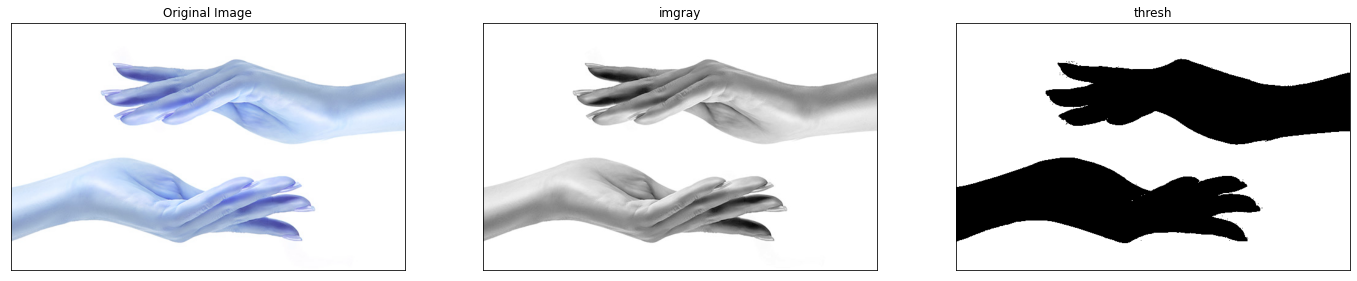

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/Users/hwangseho/Desktop/IP_2022/hand.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,250,255,0)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
# closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(24,8))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgray,cmap = 'gray')
plt.title('imgray'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(thresh,cmap = 'gray')
plt.title('thresh'), plt.xticks([]), plt.yticks([])
plt.show()

9


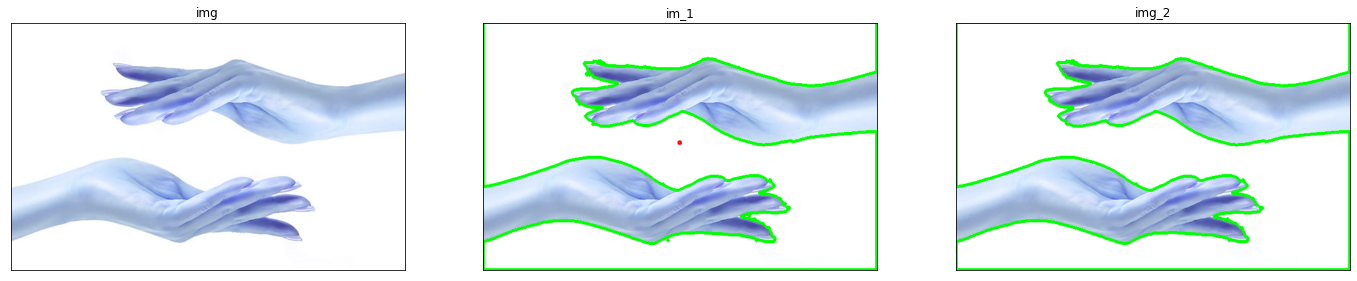

In [4]:
contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))

img_1 = img.copy()
img_2 = img.copy()
img_1 = cv2.drawContours(img_1, contours, -1, (0,255,0), 3)
img_2 = cv2.drawContours(img_2, contours, 1, (0,255,0), 3)

cnt = contours[1]
M = cv2.moments(cnt)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

img0 = cv2.rectangle(img_1, (cx-2,cy-2),(cx+2,cy+2),(255,0,0),2)

plt.figure(figsize=(24,8))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_1,cmap = 'gray')
plt.title('im_1'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_2,cmap = 'gray')
plt.title('img_2'), plt.xticks([]), plt.yticks([])
plt.show()

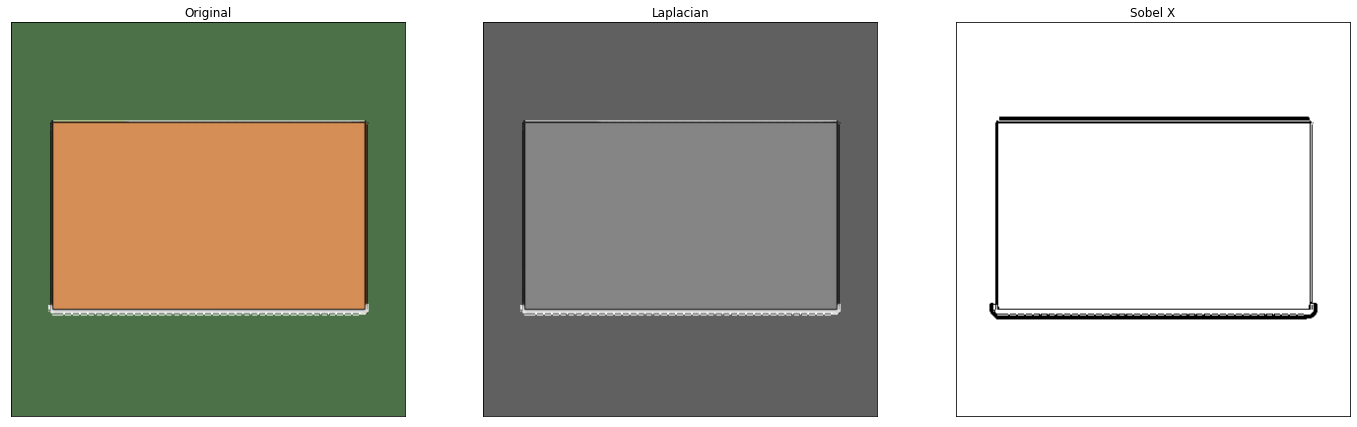

In [100]:
import cv2
import numpy as np

im = cv2.imread('/Users/hwangseho/Desktop/IP_2022/rectangle.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(imgray,100,255,0)
thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
 
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

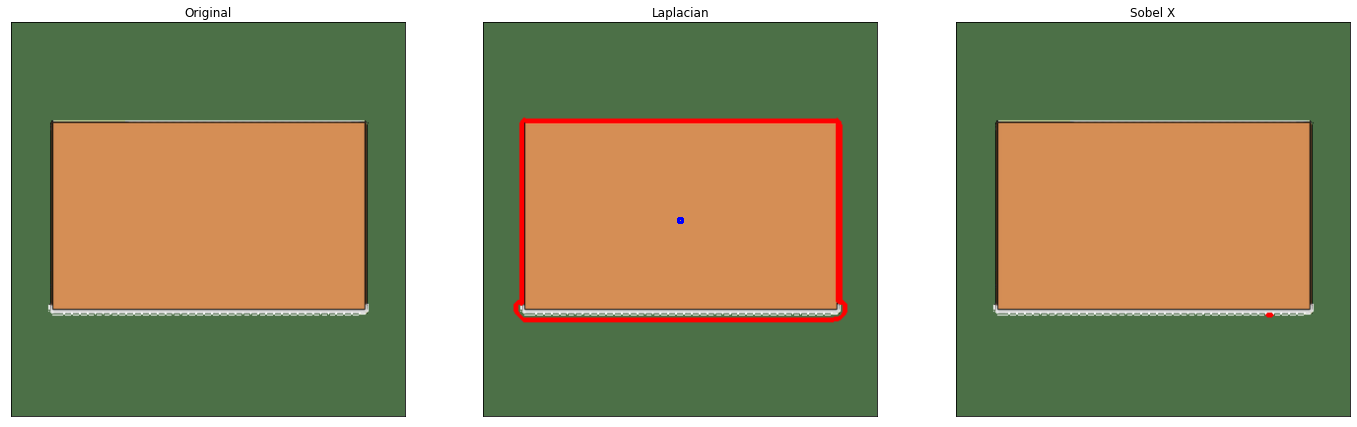

In [101]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img0 = im.copy()
img1 = im.copy()

img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

cnt = contours[2]
M = cv2.moments(cnt)
# print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)

plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

#### 11.03 ####

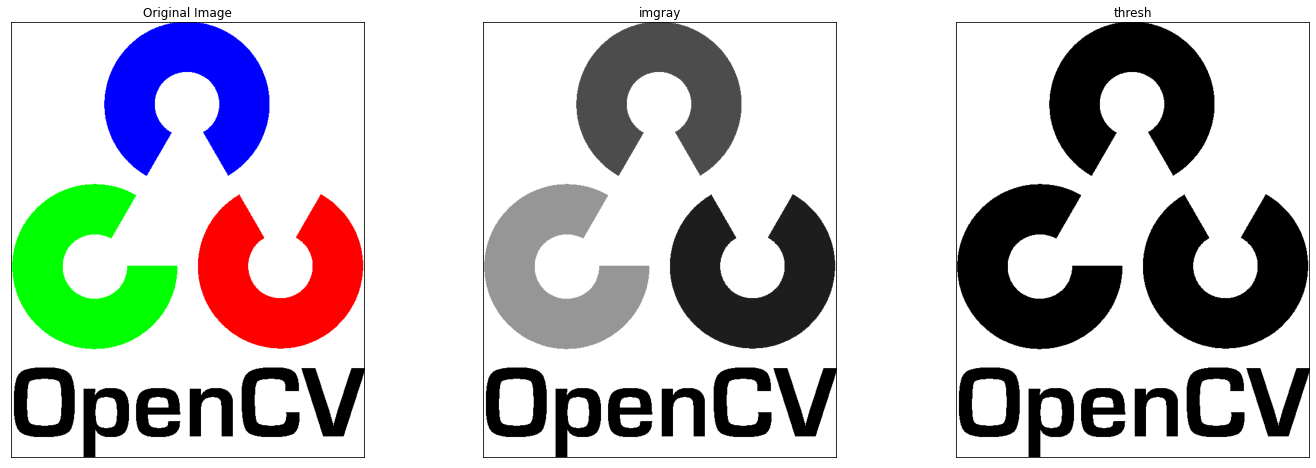

10


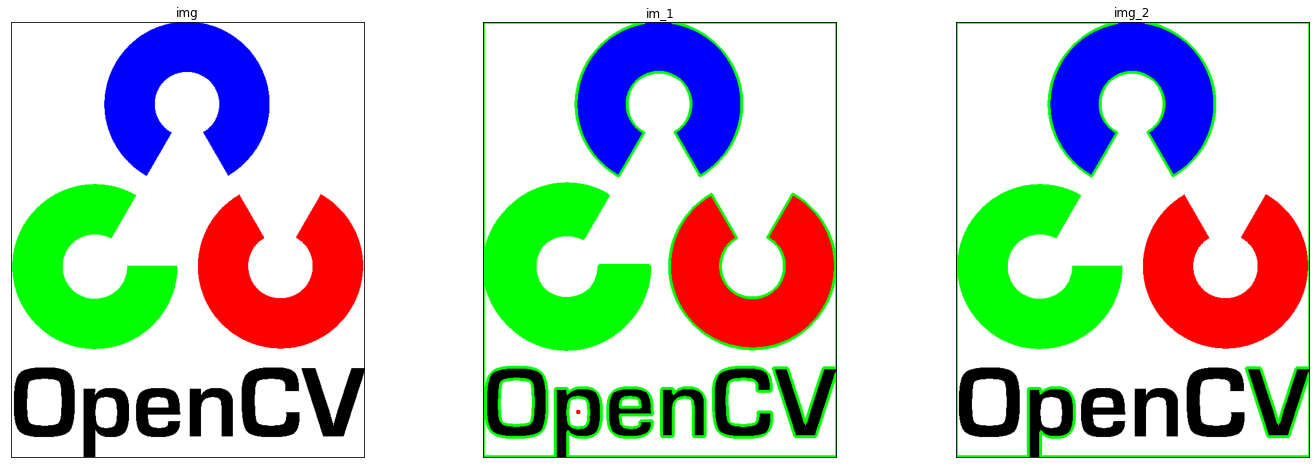

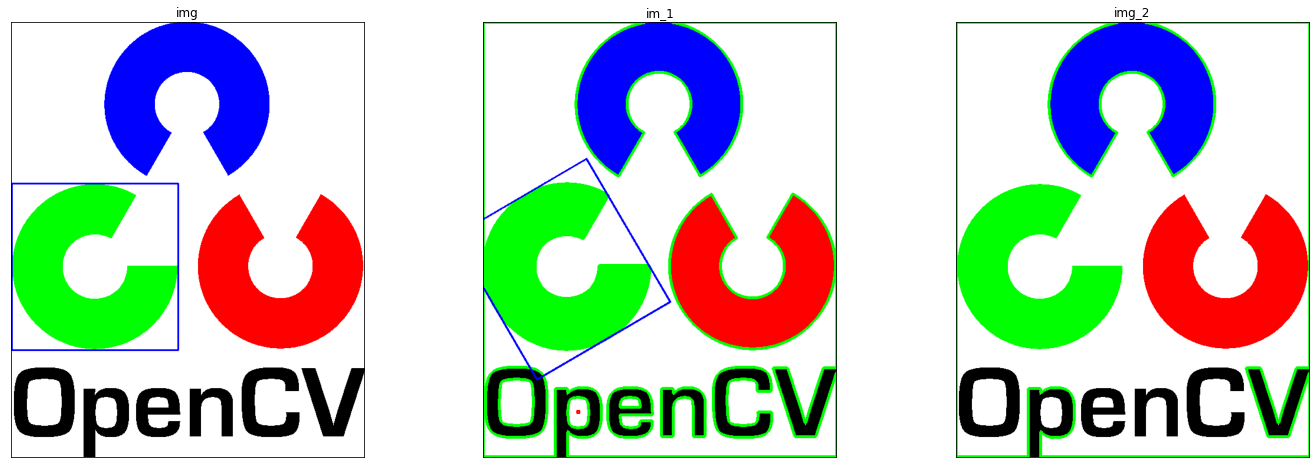

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/Users/hwangseho/Desktop/IP_2022/opencv_logo.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,250,255,0)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
# closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(24,8))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgray,cmap = 'gray')
plt.title('imgray'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(thresh,cmap = 'gray')
plt.title('thresh'), plt.xticks([]), plt.yticks([])
plt.show()

contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))

img_1 = img.copy()
img_2 = img.copy()
img_1 = cv2.drawContours(img_1, contours, -1, (0,255,0), 3)
img_2 = cv2.drawContours(img_2, contours, 1, (0,255,0), 3)

cnt = contours[0]
M = cv2.moments(cnt)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

img0 = cv2.rectangle(img_1, (cx-2,cy-2),(cx+2,cy+2),(255,0,0),2)

plt.figure(figsize=(24,8))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_1,cmap = 'gray')
plt.title('im_1'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_2,cmap = 'gray')
plt.title('img_2'), plt.xticks([]), plt.yticks([])
plt.show()

cnt = contours[9]
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
hull = cv2.convexHull(approx)

x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img_1 = cv2.drawContours(img_1,[box],0,(0,0,255),2)

area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)

plt.figure(figsize=(24,8))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_1,cmap = 'gray')
plt.title('im_1'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_2,cmap = 'gray')
plt.title('img_2'), plt.xticks([]), plt.yticks([])
plt.show()

